# Capstone Project

## 0. Importing Libraries and Loading Data

In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sms;
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

In [2]:
df_00_12 = pd.read_csv('delta_public_00_12.csv', encoding='ISO-8859-1')

C:\Users\Q416757\Anaconda3\envs\yourenvname\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 1. Project Definition
### 1.1 Introduction and High-Level Overview
#### 1.1.1 Problem Domain and project origin

The Integrated Postsecondary Education Data System (IPEDS) provides the "Delta Cost Project Database" where they collect IPEDS finance, enrollment, staffing, completions and student aid data for for the 2000–2012 academic years. I wanted to focus my analysis on the most recent years and limit the file size I have to work with as well. I therefore have chosen to analyze explicitly the 2000–2012 academic years.<br>
<br>
By collecting the data stated above they allow us to perform, among other things, longitudinal analyses of trends in postsecondary education with a focus on revenues (such as financial aid) and expenditures. A University is an example for such a postsecondary education institution.<br>
The database was originally created by the Delta Cost Project (an independent, nonprofit organization) in 2007. The maintenance and hosting of the Delta Cost Project Database was taken over by the National Center for Education Statistics (NCES) in 2012.<br>
<br>
The NCES is the primary federal entity for collecting, analyzing, and reporting data related to education in the United States and other nations. It fulfills a congressional mandate to collect, collate, analyze, and report full and complete statistics on the condition of education in the United States; conduct and publish reports and specialized analyses of the meaning and significance of such statistics; assist state and local education agencies in improving their statistical systems; and review and report on education activities in foreign countries.<br>

#### 1.1.2 Data Sets

Specifically, there are 974 variables derived from the institutional characteristics, finance, enrollment, completions, graduation rates, student financial aid, and human resources IPEDS survey components and a limited number of outside sources. The database contains one observation per institution for each year of data that is available; it includes all institutions that reported institutional characteristic data to IPEDS in the fall of each academic year. Some of the data have been adjusted to harmonize changes in financial reporting standards that occurred over time, by employing industry-accepted manipulations of the data. When possible, missing data were replaced via imputation.<br>
IPEDS provides the data in various different form (e.g. CSV-file) as well as a MS Excel-based data dictionary.<br>
<br>
### 1.2 Problem and the Strategies to solve it
Specifically, I will focus on the Relation between different grant types (e.g. state grants) and the degree completion rates (all degrees combined). There is also data available on award and certificate completion rates, but in my opinion the degree completion rate are the most important measure because, in general, the students who strive to complete a degree form the majority of all students and are of highest interest for postsecondary education institutions.<br>
<br>
I will perform descriptive statistic analysis and visualize the results.<br>
<br>
To finally answer the question: "What types of financial aid are most effective in maximizing degree completion rates?" the degree completion rates [%] will become our dependent variable and the ratios between each different grant-type and the sum of all grants [%] will become our independent variables. I will then use Machine Learning techniques. Specifically, I will perform a multiple linear regression and compute the Variance Inflation Factor (VIF) for each  feature in order to check for multicollinearity.<br>
<br>
I expect that I will gain most insight by using machine learning techniques. At first the descriptive statistic analysis and creating visualizations will be a necessary step to explore the data and to get an understanding of how the data is structured.<br>
<br>
### 1.3 Metrics used to measure performance
I will measure the performance of the overall multiple linear regression model by computing the R-Squared. This informs us about the proportion of variance in the dependent variable that is predictable from the independent variable.<br>
<br>
Moreover, I will compute the P-Value for each feature to check if I can reject the null-hypothesis stating that the value of this specific feature is zero. In other words I check for the significance of this feature. Furthermore, I will compute the Variance Inflation Factor (VIF) for each feature in order to check for multicollinearity. If multicollinearity seems to be present I will remove certain features from the model.<br>
<br>

## 2. Analysis, Methodology and Results
### 2.1 preprocessing step
#### 2.1.1 General
<br>
There are 974 variables (Column) and 87,560 rows. The combination of academicyear and unitid is an unique identifier. There are several rows of each unitid, one row for every academicyear.

In [3]:
df_00_12.head(5)

,groupid,academicyear,unitid_linchpin,unitid,isgrouped,instname,TCSName,city,state,zip,...,Iptall1,Iptall2,Iptall3,Iptall4,Iptall5,Iptall6,Iptall7,Iptall8,Ifaculty_instr_headcount,Isalarytotal
0,-475291,2012,475291,475291,0,Brown College-Brooklyn Center,NaN,Brooklyn Center,MN,55430,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
1,-475282,2012,475282,475282,0,Marian Health Careers Center-Van Nuys Campus,NaN,Van Nuys,CA,91411,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
2,-475273,2012,475273,475273,0,Springfield College-School of Human Services,NaN,Springfield,MA,01109,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
3,-475255,2012,475255,475255,0,American Broadcasting School-Online Program,NaN,Oklahoma City,OK,73115,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
4,-475246,2012,475246,475246,0,Kaplan College-Chesapeake,NaN,Chesapeake,VA,23320,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2


In [4]:
df_00_12['unitid'].value_counts()

141307    13
419217    13
367662    13
214069    13
199740    13
          ..
181598     1
468015     1
236373     1
458201     1
407559     1
Name: unitid, Length: 10568, dtype: int64

In [5]:
df_00_12[df_00_12['unitid'] == 141307]

,groupid,academicyear,unitid_linchpin,unitid,isgrouped,instname,TCSName,city,state,zip,...,Iptall1,Iptall2,Iptall3,Iptall4,Iptall5,Iptall6,Iptall7,Iptall8,Ifaculty_instr_headcount,Isalarytotal
66881,-141307,2000,141307,141307,0,Waycross College,Waycross College,Waycross,GA,31503-011,...,0,0,0,0,0,0,0,0,0,0
66882,-141307,2001,141307,141307,0,Waycross College,Waycross College,Waycross,GA,31503-011,...,-2,-2,-2,-2,-2,-2,-2,-2,-1,-1
66883,-141307,2002,141307,141307,0,Waycross College,Waycross College,Waycross,GA,31503-011,...,0,0,0,0,0,0,0,0,0,0
66884,-141307,2003,141307,141307,0,Waycross College,Waycross College,Waycross,GA,31503-011,...,-2,-2,-2,-2,-2,-2,-2,-2,0,0
66885,-141307,2004,141307,141307,0,Waycross College,Waycross College,Waycross,GA,31503-011,...,0,0,0,0,0,0,0,0,0,0
66886,-141307,2005,141307,141307,0,Waycross College,Waycross College,Waycross,GA,31503-011,...,-2,-2,-2,-2,-2,-2,-2,-2,0,0
66887,-141307,2006,141307,141307,0,Waycross College,Waycross College,Waycross,GA,31503-0110,...,0,-2,-2,0,-2,0,-2,0,0,0
66888,-141307,2007,141307,141307,0,Waycross College,Waycross College,Waycross,GA,31503-0110,...,0,-2,-2,0,-2,0,-2,0,0,0
66889,-141307,2008,141307,141307,0,Waycross College,Waycross College,Waycross,GA,31503-0110,...,0,-2,-2,0,-2,0,-2,0,0,0
66890,-141307,2009,141307,141307,0,Waycross College,Waycross College,Waycross,GA,31503-0110,...,0,-2,-2,0,-2,0,-2,0,0,0


The combination of 'academicyear' and 'unitid' is an unique identifier. There are several rows of each unitid, one row for every academicyear 

In [6]:
df_00_12[['academicyear','academicyear','totalcompletions_100fte','grant01','grant02','grant03','grant04','grant05','grant06','grant07']]

,academicyear,academicyear,totalcompletions_100fte,grant01,grant02,grant03,grant04,grant05,grant06,grant07
0,2012,2012,31.847134,1046625.0,211276.0,197336.0,NaN,NaN,NaN,1455237.0
1,2012,2012,47.619048,198269.0,NaN,NaN,NaN,NaN,NaN,207269.0
2,2012,2012,45.206275,4390892.0,NaN,NaN,NaN,2067400.0,NaN,6458292.0
3,2012,2012,89.855072,393685.0,NaN,NaN,NaN,NaN,NaN,393685.0
4,2012,2012,62.162162,361836.0,11101.0,115827.0,NaN,NaN,NaN,489264.0
...,...,...,...,...,...,...,...,...,...,...
87555,2011,2011,7.821229,1306516.0,42408.0,1500.0,NaN,NaN,NaN,1512056.0
87556,2012,2012,34.421365,1070872.0,33008.0,1700.0,NaN,NaN,NaN,1583426.0
87557,2010,2010,4.635762,382504.0,18250.0,NaN,NaN,NaN,NaN,480180.0
87558,2011,2011,11.764706,514270.0,15968.0,877.0,NaN,NaN,NaN,696923.0


In [9]:
# Number of Rows
df_00_12.shape

(87560, 974)

#### 2.1.2 Dependent variable 

The variable totaldegrees_100_fte (number of degrees granted per 100 full time equivalent students enrolled) is our dependent variable variable and it should therefore be always a Non-NaN-Value. I dropped every row were the totaldegrees_100_fte was NaN. (75% of the whole dataset remaining)<br>
<br>
The variable totaldegrees_100_fte should be between 0.00 and 1.00 for every row. In reality the was no normalization, so the values were greater than 1.00 and in some rare cases even greater than 100.00. I decided to impute the value 100.00 for those rows with a totaldegrees_100_fte greater than 100.00.<br>
<br>
Additionally, I created new column totaldegrees_100_percent_fte where the values are normalized.<br>
<br>
totaldegrees_100_percent_fte = totaldegrees_100_fte / 100<br>
<br>
No Values is greater than 1.00<br>

In [7]:
# Investigate the Total completions per 100 FTE students Values
df_00_12[df_00_12['totalcompletions_100fte'].isna() == True]['totalcompletions_100fte']

10      NaN
18      NaN
32      NaN
189     NaN
198     NaN
         ..
87348   NaN
87349   NaN
87455   NaN
87456   NaN
87508   NaN
Name: totalcompletions_100fte, Length: 12325, dtype: float64

In [8]:
df_00_12['totaldegrees_100fte'].isna().sum()

22553

In [10]:
# Print an Example where the Total completions per 100 FTE students Value is NaN
df_00_12[['academicyear','academicyear','totaldegrees_100fte','grant01','grant02','grant03','grant04','grant05','grant06','grant07']].head(11)

,academicyear,academicyear,totaldegrees_100fte,grant01,grant02,grant03,grant04,grant05,grant06,grant07
0,2012,2012,31.847134,1046625.0,211276.0,197336.0,NaN,NaN,NaN,1455237.0
1,2012,2012,NaN,198269.0,NaN,NaN,NaN,NaN,NaN,207269.0
2,2012,2012,45.206275,4390892.0,NaN,NaN,NaN,2067400.0,NaN,6458292.0
3,2012,2012,NaN,393685.0,NaN,NaN,NaN,NaN,NaN,393685.0
4,2012,2012,0.000000,361836.0,11101.0,115827.0,NaN,NaN,NaN,489264.0
5,2012,2012,211.111111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2012,2012,44.067797,846006.0,9047.0,365237.0,NaN,2500.0,NaN,1222790.0
7,2012,2012,0.000000,973972.0,NaN,NaN,NaN,NaN,NaN,973972.0
8,2012,2012,13.888889,NaN,NaN,NaN,NaN,27220.0,NaN,27220.0
9,2012,2012,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since the Total completions per 100 FTE students are the depentent varible I am going to drop the NaN-Rows. <br>
So I am going to drop 12,325 out of 87,560 rows.

In [11]:
df_00_12['totaldegrees_100fte']

0        31.847134
1              NaN
2        45.206275
3              NaN
4         0.000000
           ...    
87555    22.025608
87556    30.563798
87557     4.635762
87558    11.764706
87559    20.833333
Name: totaldegrees_100fte, Length: 87560, dtype: float64

In [12]:
df_00_12['totaldegrees_100fte'].describe()

count    65007.000000
mean        18.006368
std         18.489722
min          0.000000
25%          1.365204
50%         17.861658
75%         25.906060
max       1259.261871
Name: totaldegrees_100fte, dtype: float64

There are some rows with more than 100 degrees granted per 100 full time equivalent students enrolled.

In [13]:
# Show Rows with more than 100 degrees granted per 100 full time equivalent students enrolled
df_00_12[['academicyear','academicyear','totaldegrees_100fte','grant01','grant02','grant03','grant04','grant05','grant06','grant07']][df_00_12['totaldegrees_100fte'] > 100]

,academicyear,academicyear,totaldegrees_100fte,grant01,grant02,grant03,grant04,grant05,grant06,grant07
5,2012,2012,211.111111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,2012,2012,269.230769,1845722.0,NaN,NaN,NaN,NaN,NaN,1845722.0
186,2012,2012,196.788991,12950.0,NaN,NaN,NaN,NaN,NaN,12950.0
1816,2012,2012,195.454545,139372.0,7557.0,NaN,NaN,NaN,NaN,223403.0
2204,2010,2010,125.277778,749965.0,28286.0,157403.0,NaN,NaN,NaN,935654.0
...,...,...,...,...,...,...,...,...,...,...
84743,2000,2000,113.586308,2296171.0,87258.0,880137.0,NaN,NaN,NaN,3294766.0
85338,2007,2007,135.483871,300000.0,500.0,1500.0,NaN,NaN,NaN,302000.0
85339,2008,2008,129.687500,300000.0,500.0,1500.0,NaN,NaN,NaN,302000.0
85340,2009,2009,129.687500,370000.0,38000.0,16000.0,NaN,NaN,NaN,426000.0


In [14]:
df_00_12.shape

(87560, 974)

In [40]:
# Drop rows with NaN-Values for out Dependent variable
df_00_12_cleaned = df_00_12[df_00_12['totaldegrees_100fte'].notna()]

In [41]:
df_00_12_cleaned.shape

(65007, 974)

In [42]:
# Changing the value to 100 for every row with more than 100 degrees granted per 100 full time equivalent students enrolled.
df_00_12_cleaned.loc[df_00_12_cleaned['totaldegrees_100fte'] > 100, 'totaldegrees_100fte'] = 100

In [43]:
df_00_12_cleaned[['academicyear','academicyear','totaldegrees_100fte','grant01','grant02','grant03','grant04','grant05','grant06','grant07']][df_00_12_cleaned['totaldegrees_100fte'] > 100].head(5)

,academicyear,academicyear,totaldegrees_100fte,grant01,grant02,grant03,grant04,grant05,grant06,grant07


In [44]:
df_00_12_cleaned['totaldegrees_100fte'].describe()

count    65007.000000
mean        17.788137
std         15.215702
min          0.000000
25%          1.365204
50%         17.861658
75%         25.906060
max        100.000000
Name: totaldegrees_100fte, dtype: float64

In [45]:
# Add a column where the values are normalized
df_00_12_cleaned['totaldegrees_100%fte'] = df_00_12_cleaned['totaldegrees_100fte'] / 100

C:\Users\Q416757\Anaconda3\envs\yourenvname\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [75]:
df_00_12_cleaned = df_00_12_cleaned.rename(columns={'totaldegrees_100%fte': 'totaldegrees_100_percent_fte'})

In [47]:
df_00_12_cleaned['totaldegrees_100_percent_fte'].describe()

count    65007.000000
mean         0.177881
std          0.152157
min          0.000000
25%          0.013652
50%          0.178617
75%          0.259061
max          1.000000
Name: totaldegrees_100%fte, dtype: float64

#### 2.1.3 Independent variable
<br>
The independent values are the different grant-types:<br>
<br>
1. Pell Grants (grant01): these are the gross amount of Pell grants disbursed or otherwise made available to recipients by the institution.<br>
2. Other federal grants (grant02): these are expenditures for scholarships and fellowships, excluding Pell grants, that were funded from federal government agencies. This includes Supplemental Educational Opportunity Grants (SEOG), State Student Incentive Grants (SSIG), but not loans or College Work Study Program.<br>
3. State grants (grant03): This includes expenditures for scholarships and fellowships that were funded by the state.<br>
4. Local grants (grant04): These are for scholarships and fellowships that were funded by local government.<br>
5. Institutional grants funded (grant05): These are expenditures for scholarships and fellowships received from private sources (e.g., businesses, foundations, individuals, foreign governments) that used restricted-expendable net assets of the institution.<br>
6. Institutional grants unfunded (grant06): These are expenditures for scholarships and fellowships from unrestricted net assets of the institution. The institutional matching portion of federal, state, or local grants is reported here, as are athletic scholarships.<br>
<br>
A NaN-Value means that there are 0.00 US-Dollar of this specific grant type. NaN-Values are not as problematic as they are for a dependent variable. Therefore NaN-Values were filled with zeros.<br>
<br>
We want to find out how different percentages of grant-types affect the degree completion rate. So for example the combination of 70% grant01 and 30% grant02 leads to a degree completion rate of 50%. In my analysis it is all about the ratio between a single grant-type and the total sum. (e.g. grant01 accounts for 70% of the total amount of all grant-types) Hence, for each grant-type I had to compute the Ratio between the amount of this specific grant-type and the total sum of Pell, Federal, State, Local, and Institutional Grants (funded and unfunded). The total sum is represented by the variable grant07<br>
<br>
grant01_ratio = grant01 / grant07<br>
<br>
It turned out that there were 11 cases where the single amount of a grant-type exceeded the total sum of Pell, Federal, State, Local, and Institutional Grants (funded and unfunded). I decided to drop the rows of these outliers.<br>
<br>
I also checked if there are rows where not a single grant-type is non-zero by filtering the rows where grant07 is zero. Since those grant-type variables should become our independent variables I decided to drop those 1,891 rows.<br>
<br>
Besides checking if a single grant-type exceeds the total sum of Pell, Federal, State, Local, and Institutional Grants (funded and unfunded) I finally checked if the sum of grant01, grant02, grant03, grant04, grant05 and grant06 is equal to grant07. There were only marginal differences. So there is no need to clean or drop rows.<br>
<br>
In order to perform a Multiple Linear Regression I added a column “Intercept” filled with the value 1.


In [48]:
cols = ['grant01','grant02','grant03','grant04','grant05','grant06','grant07']
df_00_12_cleaned[cols] = df_00_12_cleaned[cols].replace({np.nan:0})

In [49]:
df_00_12_cleaned[['academicyear','academicyear','totalcompletions_100fte','grant01','grant02','grant03','grant04','grant05','grant06','grant07']].head(11)

,academicyear,academicyear,totalcompletions_100fte,grant01,grant02,grant03,grant04,grant05,grant06,grant07
0,2012,2012,31.847134,1046625.0,211276.0,197336.0,0.0,0.0,0.0,1455237.0
2,2012,2012,45.206275,4390892.0,0.0,0.0,0.0,2067400.0,0.0,6458292.0
4,2012,2012,62.162162,361836.0,11101.0,115827.0,0.0,0.0,0.0,489264.0
5,2012,2012,303.703704,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2012,2012,49.152542,846006.0,9047.0,365237.0,0.0,2500.0,0.0,1222790.0
7,2012,2012,1.744186,973972.0,0.0,0.0,0.0,0.0,0.0,973972.0
8,2012,2012,19.444444,0.0,0.0,0.0,0.0,27220.0,0.0,27220.0
9,2012,2012,23.214286,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,2012,2012,79.268293,272584.0,1280.0,0.0,0.0,0.0,0.0,286834.0
12,2012,2012,5.158801,47290051.0,5644521.0,450731.0,0.0,0.0,0.0,67018991.0


Compute the Ratio between each different grant-type and the sum of Pell, Federal, State, Local, and Institutional Grants (funded and unfunded)

In [50]:
df_00_12_cleaned['grant01_ratio'] = df_00_12_cleaned['grant01'] / df_00_12_cleaned['grant07']

C:\Users\Q416757\Anaconda3\envs\yourenvname\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
df_00_12_cleaned['grant01_ratio'].describe()

count    63116.000000
mean         0.666745
std         27.425577
min          0.000000
25%          0.204235
50%          0.612503
75%          0.890673
max       6889.950000
Name: grant01_ratio, dtype: float64

In [52]:
# Show the rows where the ratio is greater than 100%
df_00_12_cleaned[['academicyear','academicyear','totaldegrees_100fte','grant01','grant02','grant03','grant04','grant05','grant06','grant07']][df_00_12_cleaned['grant01_ratio'] > 1]

,academicyear,academicyear,totaldegrees_100fte,grant01,grant02,grant03,grant04,grant05,grant06,grant07
2823,2008,2008,0.000000,1.377990e+05,3943.963867,0.000000,0.0,0.0,0.0,20.000000
3621,2010,2010,100.000000,2.123444e+04,0.000000,0.000000,0.0,0.0,0.0,2585.000000
8741,2002,2002,0.000000,4.384000e+03,0.000000,0.000000,0.0,0.0,0.0,3897.000000
13330,2004,2004,0.000000,1.092080e+05,0.000000,0.000000,0.0,0.0,0.0,82227.000000
20217,2000,2000,0.000000,6.823234e+05,0.000000,0.000000,0.0,0.0,0.0,669762.562500
30159,2001,2001,0.000000,3.832877e+04,0.000000,0.000000,0.0,0.0,0.0,38219.558594
33703,2000,2000,13.719852,1.107290e+06,315320.000000,0.000000,0.0,16380.0,484132.0,815832.000000
41581,2001,2001,0.000000,3.348621e+04,0.000000,19999.000000,3123.0,8950.0,0.0,32072.000000
60565,2001,2001,0.000000,7.913841e+04,0.000000,0.000000,0.0,0.0,0.0,79125.500000
65055,2009,2009,45.207443,1.579620e+05,95519.789062,159318.796875,0.0,3500.0,0.0,3500.000000


In [53]:
df_00_12_cleaned['grant01_ratio'][df_00_12_cleaned['grant01_ratio'] <= 1].value_counts()

1.000000    6905
0.000000    3678
0.500000      20
0.856069       5
0.106464       5
            ... 
0.615075       1
0.959077       1
0.130429       1
0.363947       1
0.559950       1
Name: grant01_ratio, Length: 51922, dtype: int64

In [54]:
df_00_12_cleaned['grant01_ratio'][df_00_12_cleaned['grant01_ratio'] > 1].value_counts()

1.002857       1
1.044095       1
6889.950000    1
1.124968       1
1.328128       1
8.214485       1
45.132009      1
1.000163       1
1.315166       1
1.018754       1
1.357252       1
Name: grant01_ratio, dtype: int64

In [55]:
df_00_12_cleaned['grant01_ratio'].value_counts()

1.000000    6905
0.000000    3678
0.500000      20
0.856069       5
0.106464       5
            ... 
0.318447       1
0.615075       1
0.959077       1
0.130429       1
0.667894       1
Name: grant01_ratio, Length: 51933, dtype: int64

In [56]:
# Check for NaN-Value
df_00_12_cleaned[['academicyear','academicyear','totalcompletions_100fte','grant01','grant01_ratio','grant02','grant03','grant04','grant05','grant06','grant07']][df_00_12_cleaned['grant01_ratio'].isna() == True]

,academicyear,academicyear,totalcompletions_100fte,grant01,grant01_ratio,grant02,grant03,grant04,grant05,grant06,grant07
5,2012,2012,303.703704,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
9,2012,2012,23.214286,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
195,2012,2012,21.917808,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
196,2012,2012,11.956522,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
205,2012,2012,24.637681,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
87491,2005,2005,35.334337,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
87509,2005,2005,4.852150,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
87517,2004,2004,0.000000,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
87518,2005,2005,12.770748,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
cols = ['grant01_ratio']
df_00_12_cleaned[cols] = df_00_12_cleaned[cols].replace({np.nan:0})

In [58]:
# Check for NaN-Value again
df_00_12_cleaned[['academicyear','academicyear','totalcompletions_100fte','grant01','grant01_ratio','grant02','grant03','grant04','grant05','grant06','grant07']][df_00_12_cleaned['grant01_ratio'].isna() == True]

,academicyear,academicyear,totalcompletions_100fte,grant01,grant01_ratio,grant02,grant03,grant04,grant05,grant06,grant07


In [59]:
df_00_12_cleaned['grant01_ratio'].value_counts()

1.000000    6905
0.000000    5569
0.500000      20
0.106464       5
0.856069       5
            ... 
0.318447       1
0.615075       1
0.959077       1
0.130429       1
0.667894       1
Name: grant01_ratio, Length: 51933, dtype: int64

In [60]:
# Drop Outlier-row
df_00_12_cleaned = df_00_12_cleaned[df_00_12_cleaned['grant01_ratio'] <= 1]

In [61]:
df_00_12_cleaned['grant01_ratio'].value_counts()

1.000000    6905
0.000000    5569
0.500000      20
0.856069       5
0.106464       5
            ... 
0.318447       1
0.615075       1
0.959077       1
0.130429       1
0.559950       1
Name: grant01_ratio, Length: 51922, dtype: int64

In [34]:
df_00_12_cleaned[['academicyear','academicyear','totaldegrees_100fte','grant01','grant02','grant03','grant04','grant05','grant06','grant07']][df_00_12_cleaned['grant01_ratio'] > 100]

,academicyear,academicyear,totaldegrees_100fte,grant01,grant02,grant03,grant04,grant05,grant06,grant07


In [62]:
# Doing the same steps again for the remaining grant-types

df_00_12_cleaned['grant02_ratio'] = df_00_12_cleaned['grant02'] / df_00_12_cleaned['grant07']
df_00_12_cleaned['grant03_ratio'] = df_00_12_cleaned['grant03'] / df_00_12_cleaned['grant07']
df_00_12_cleaned['grant04_ratio'] = df_00_12_cleaned['grant04'] / df_00_12_cleaned['grant07']
df_00_12_cleaned['grant05_ratio'] = df_00_12_cleaned['grant05'] / df_00_12_cleaned['grant07']
df_00_12_cleaned['grant06_ratio'] = df_00_12_cleaned['grant06'] / df_00_12_cleaned['grant07']

cols = ['grant02_ratio','grant03_ratio','grant04_ratio','grant05_ratio','grant06_ratio']
df_00_12_cleaned[cols] = df_00_12_cleaned[cols].replace({np.nan:0})

df_00_12_cleaned = df_00_12_cleaned[df_00_12_cleaned['grant02_ratio'] <= 1]
df_00_12_cleaned = df_00_12_cleaned[df_00_12_cleaned['grant03_ratio'] <= 1]
df_00_12_cleaned = df_00_12_cleaned[df_00_12_cleaned['grant04_ratio'] <= 1]
df_00_12_cleaned = df_00_12_cleaned[df_00_12_cleaned['grant05_ratio'] <= 1]
df_00_12_cleaned = df_00_12_cleaned[df_00_12_cleaned['grant06_ratio'] <= 1]

print(df_00_12_cleaned['grant02_ratio'].isna().sum())
print(df_00_12_cleaned['grant02_ratio'].describe())
print(df_00_12_cleaned['grant03_ratio'].isna().sum())
print(df_00_12_cleaned['grant03_ratio'].describe())
print(df_00_12_cleaned['grant04_ratio'].isna().sum())
print(df_00_12_cleaned['grant04_ratio'].describe())
print(df_00_12_cleaned['grant05_ratio'].isna().sum())
print(df_00_12_cleaned['grant05_ratio'].describe())
print(df_00_12_cleaned['grant06_ratio'].isna().sum())
print(df_00_12_cleaned['grant06_ratio'].describe())
print(df_00_12_cleaned.shape)

0
count    64966.000000
mean         0.057872
std          0.110794
min          0.000000
25%          0.000000
50%          0.027891
75%          0.057504
max          1.000000
Name: grant02_ratio, dtype: float64
0
count    64966.000000
mean         0.103798
std          0.150766
min         -0.009030
25%          0.000000
50%          0.030555
75%          0.158483
max          1.000000
Name: grant03_ratio, dtype: float64
0
count    64966.000000
mean         0.004644
std          0.040177
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: grant04_ratio, dtype: float64
0
count    64966.000000
mean         0.077535
std          0.186205
min          0.000000
25%          0.000000
50%          0.000000
75%          0.060798
max          1.000000
Name: grant05_ratio, dtype: float64
0
count    64966.000000
mean         0.175389
std          0.276012
min          0.000000
25%          0.000000
50%          0.000000
75%       

In [63]:
# Are there any rows where the total grant value is zero?

df_00_12_cleaned[['academicyear','academicyear','totaldegrees_100fte','grant01','grant02','grant03','grant04','grant05','grant06','grant07']][df_00_12_cleaned['grant07'] == 0]

,academicyear,academicyear,totaldegrees_100fte,grant01,grant02,grant03,grant04,grant05,grant06,grant07
5,2012,2012,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2012,2012,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
195,2012,2012,21.917808,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,2012,2012,11.956522,0.0,0.0,0.0,0.0,0.0,0.0,0.0
205,2012,2012,24.637681,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
87491,2005,2005,30.286575,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87509,2005,2005,4.852150,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87517,2004,2004,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87518,2005,2005,12.770748,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
# Drop these rows since those columns should become our independent variables
df_00_12_cleaned = df_00_12_cleaned[df_00_12_cleaned['grant07'] > 0]
df_00_12_cleaned.shape

(63075, 981)

In [70]:
df_00_12_cleaned[['academicyear','academicyear','totaldegrees_100_percent_fte','grant01_ratio','grant02_ratio','grant03_ratio','grant04_ratio','grant05_ratio','grant06_ratio','grant07']].head(5)

,academicyear,academicyear,totaldegrees_100%fte,grant01_ratio,grant02_ratio,grant03_ratio,grant04_ratio,grant05_ratio,grant06_ratio,grant07
0,2012,2012,0.318471,0.719213,0.145183,0.135604,0.0,0.000000,0.0,1455237.0
2,2012,2012,0.452063,0.679884,0.000000,0.000000,0.0,0.320116,0.0,6458292.0
4,2012,2012,0.000000,0.739552,0.022689,0.236737,0.0,0.000000,0.0,489264.0
6,2012,2012,0.440678,0.691865,0.007399,0.298692,0.0,0.002045,0.0,1222790.0
7,2012,2012,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,973972.0


In [ ]:
# Are there any rows where the sum of grant1, grant2, grant3, grant4, grant5 and grant6 is not equivalent to grant7?

In [67]:
df_00_12_cleaned['grant_sum_check'] = df_00_12_cleaned['grant07'] - df_00_12_cleaned['grant01'] - df_00_12_cleaned['grant02'] - df_00_12_cleaned['grant03'] - df_00_12_cleaned['grant04'] - df_00_12_cleaned['grant05'] - df_00_12_cleaned['grant06']

In [68]:
df_00_12_cleaned['grant_sum_check'].describe()

count    6.307500e+04
mean     6.464027e+04
std      1.933890e+06
min     -2.767640e+07
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.826800e+08
Name: grant_sum_check, dtype: float64

The sum of grant1, grant2, grant3, grant4, grant5 and grant6 is more or less equvialent to grant7. No need to clean or drop rows.

### 2.2 Exploratory analysis (descriptive statistics) and visualizations
#### 2.2.1 Dependent variables
<br>
The value of the totaldegrees_100_percent_fte variable was always around 16% prior to 2008. During the 2008–2012 academic year is was constantly over 22%. I could not find any evidence that this spike is caused by the data manipulation or imputation of IPEDS. Rather it seems that this spike actually happened.

In [91]:
mean_grant01_ratio = df_00_12_cleaned['grant01_ratio'].mean()
mean_grant02_ratio = df_00_12_cleaned['grant02_ratio'].mean()
mean_grant03_ratio = df_00_12_cleaned['grant03_ratio'].mean()
mean_grant04_ratio = df_00_12_cleaned['grant04_ratio'].mean()
mean_grant05_ratio = df_00_12_cleaned['grant05_ratio'].mean()
mean_grant06_ratio = df_00_12_cleaned['grant06_ratio'].mean()


In [92]:
mean_grant01_ratio + mean_grant02_ratio + mean_grant03_ratio + mean_grant04_ratio + mean_grant05_ratio + mean_grant06_ratio

0.9885755208529992

In [131]:
df_sub = pd.DataFrame(df_00_12_cleaned[['academicyear','totaldegrees_100_percent_fte']].groupby('academicyear').mean())
df_sub['academicyear'] = df_sub.index
df_sub

,totaldegrees_100_percent_fte,academicyear
academicyear,,
2000,0.155593,2000
2001,0.156757,2001
2002,0.152142,2002
2003,0.152495,2003
2004,0.154342,2004
2005,0.151909,2005
2006,0.153927,2006
2007,0.155063,2007
2008,0.234450,2008


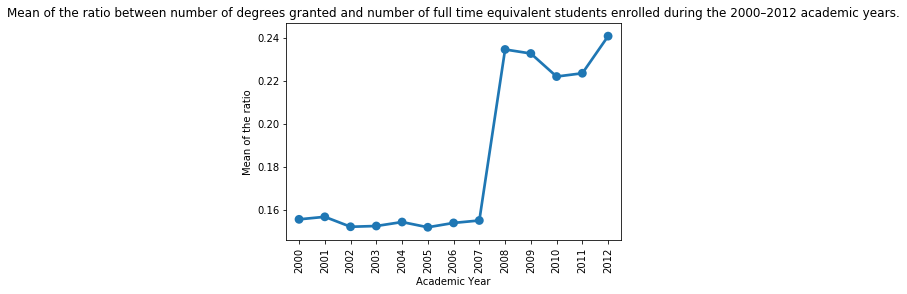

In [188]:
ax = sb.pointplot(data = df_sub, x = 'academicyear', y = 'totaldegrees_100_percent_fte')
plt.xlabel('Academic Year')
plt.ylabel('Mean of the ratio')
plt.title('Mean of the ratio between number of degrees granted and number of full time equivalent students enrolled during the 2000–2012 academic years.');                 
plt.xticks(rotation = 90);

#### 2.2.2 Independent variables

During the years of interest pell grants form the majority of all grant-types. This grant-type was also the only one were in a very few cases the amount exceeded the total sum of all grants.<br>
<br>
However for the academic year of 2008 we can observe a sharp decline in the Pell grant ratio, an increase in the Institutional grant ratios (funded as well as unfunded) and also an increase in the State grants ratio. I had to normalize the data again by dividing by the factor 0.98 because not in all cases the different grant-type ratios add up to exactly 1.00.<br>
<br>
Let’s have a look at a lower level: We can see that the Pell Grant Ratio is unevenly distributed. In most cases it is either around 0.00 or around 1.00. But at the same time there are also a lot of cases where the ratio is in-between zero and one.<br>
<br>
Contrary all other grant-types seem to have a rather right-skewed distribution. For the majority of cases the ratio is at the lower end of the scale.<br>


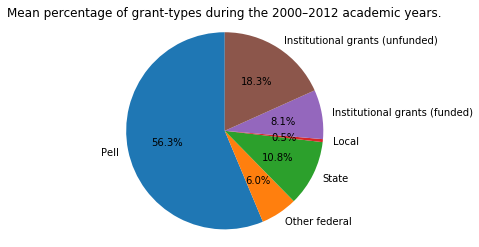

In [186]:
labels = 'Pell', 'Other federal', 'State', 'Local', 'Institutional grants (funded)', 'Institutional grants (unfunded)'
sizes = [mean_grant01_ratio/0.9885755208529992, mean_grant02_ratio/0.9885755208529992, mean_grant03_ratio/0.9885755208529992, mean_grant04_ratio/0.9885755208529992, mean_grant05_ratio/0.9885755208529992, mean_grant06_ratio/0.9885755208529992]


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Mean percentage of grant-types during the 2000–2012 academic years.')
plt.show()

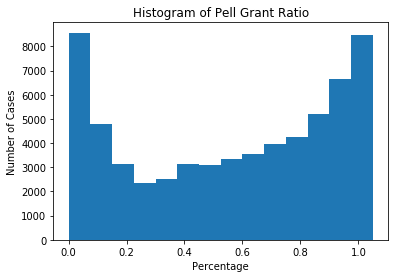

In [192]:
bin_edges = np.arange(0.00, 1.05, 0.075)
plt.hist(data = df_00_12_cleaned, x = 'grant01_ratio', bins = bin_edges)
plt.title('Histogram of Pell Grant Ratio')
plt.xlabel('Percentage')
plt.ylabel('Number of Cases');   

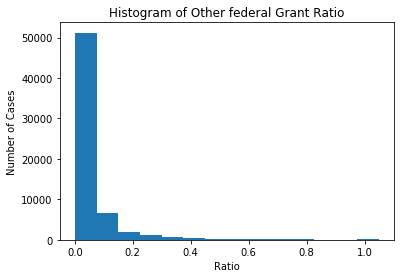

In [193]:
bin_edges = np.arange(0.00, 1.05, 0.075)
plt.hist(data = df_00_12_cleaned, x = 'grant02_ratio', bins = bin_edges)
plt.title('Histogram of Other federal Grant Ratio')
plt.xlabel('Ratio')
plt.ylabel('Number of Cases');   

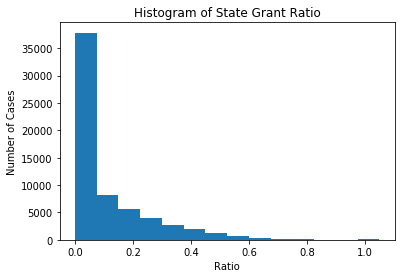

In [194]:
bin_edges = np.arange(0.00, 1.05, 0.075)
plt.hist(data = df_00_12_cleaned, x = 'grant03_ratio', bins = bin_edges)
plt.title('Histogram of State Grant Ratio')
plt.xlabel('Ratio')
plt.ylabel('Number of Cases');   

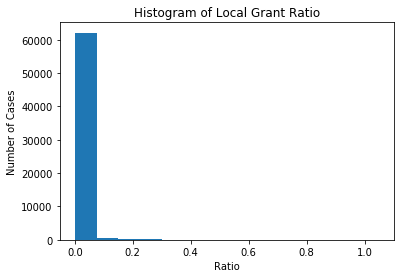

In [197]:
bin_edges = np.arange(0.00, 1.05, 0.075)
plt.hist(data = df_00_12_cleaned, x = 'grant04_ratio', bins = bin_edges)
plt.title('Histogram of Local Grant Ratio')
plt.xlabel('Ratio')
plt.ylabel('Number of Cases');   

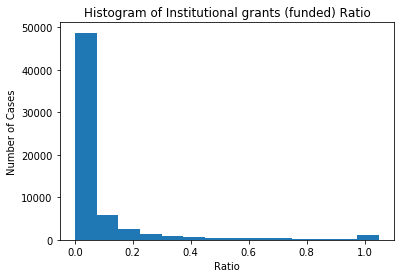

In [196]:
bin_edges = np.arange(0.00, 1.05, 0.075)
plt.hist(data = df_00_12_cleaned, x = 'grant05_ratio', bins = bin_edges)
plt.title('Histogram of Institutional grants (funded) Ratio')
plt.xlabel('Ratio')
plt.ylabel('Number of Cases');   

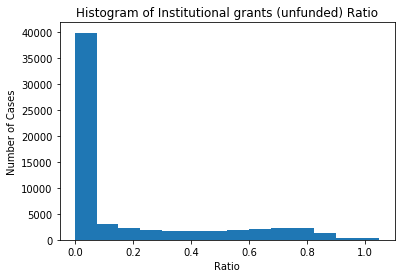

In [195]:
bin_edges = np.arange(0.00, 1.05, 0.075)
plt.hist(data = df_00_12_cleaned, x = 'grant06_ratio', bins = bin_edges)
plt.title('Histogram of Institutional grants (unfunded) Ratio')
plt.xlabel('Ratio')
plt.ylabel('Number of Cases');  

In [135]:
df_sub_grant1 = pd.DataFrame(df_00_12_cleaned[['academicyear','grant01_ratio']].groupby('academicyear').mean())
df_sub_grant1['academicyear'] = df_sub.index
df_sub_grant1

,grant01_ratio,academicyear
academicyear,,
2000,0.561776,2000
2001,0.571104,2001
2002,0.583463,2002
2003,0.593083,2003
2004,0.597675,2004
2005,0.597104,2005
2006,0.585617,2006
2007,0.579083,2007
2008,0.444091,2008


In [136]:
df_sub_grant2 = pd.DataFrame(df_00_12_cleaned[['academicyear','grant02_ratio']].groupby('academicyear').mean())
df_sub_grant2['academicyear'] = df_sub.index

df_sub_grant3 = pd.DataFrame(df_00_12_cleaned[['academicyear','grant03_ratio']].groupby('academicyear').mean())
df_sub_grant3['academicyear'] = df_sub.index

df_sub_grant4 = pd.DataFrame(df_00_12_cleaned[['academicyear','grant04_ratio']].groupby('academicyear').mean())
df_sub_grant4['academicyear'] = df_sub.index

df_sub_grant5 = pd.DataFrame(df_00_12_cleaned[['academicyear','grant05_ratio']].groupby('academicyear').mean())
df_sub_grant5['academicyear'] = df_sub.index

df_sub_grant6 = pd.DataFrame(df_00_12_cleaned[['academicyear','grant06_ratio']].groupby('academicyear').mean())
df_sub_grant6['academicyear'] = df_sub.index

In [139]:
df_sub_grant1.index.name = 'index'
df_sub_grant2.index.name = 'index'
df_sub_grant3.index.name = 'index'
df_sub_grant4.index.name = 'index'
df_sub_grant5.index.name = 'index'
df_sub_grant6.index.name = 'index'

In [151]:
df_sub_all = pd.merge(df_sub_grant1, df_sub_grant2, on='academicyear')
df_sub_all = pd.merge(df_sub_all, df_sub_grant3, on='academicyear')
df_sub_all = pd.merge(df_sub_all, df_sub_grant4, on='academicyear')
df_sub_all = pd.merge(df_sub_all, df_sub_grant5, on='academicyear')
df_sub_all = pd.merge(df_sub_all, df_sub_grant6, on='academicyear')

In [152]:
df_sub_all

,grant01_ratio,academicyear,grant02_ratio,grant03_ratio,grant04_ratio,grant05_ratio,grant06_ratio
0,0.561776,2000,0.071373,0.119555,0.004995,0.076559,0.157167
1,0.571104,2001,0.065047,0.119944,0.005189,0.075077,0.155896
2,0.583463,2002,0.062043,0.110406,0.004643,0.076532,0.156470
3,0.593083,2003,0.063031,0.105025,0.004229,0.073702,0.155162
4,0.597675,2004,0.055661,0.102028,0.005201,0.073951,0.157242
5,0.597104,2005,0.056154,0.102801,0.005324,0.073195,0.155925
6,0.585617,2006,0.054104,0.106857,0.005916,0.074735,0.159992
7,0.579083,2007,0.056455,0.110040,0.005975,0.074254,0.161938
8,0.444091,2008,0.061550,0.130607,0.005189,0.104690,0.238706
9,0.466010,2009,0.054243,0.119277,0.004733,0.098220,0.238380


In [166]:
df_sub_all.set_index('academicyear', inplace=True)

In [167]:
df_sub_all

,grant01_ratio,grant02_ratio,grant03_ratio,grant04_ratio,grant05_ratio,grant06_ratio
academicyear,,,,,,
2000,0.561776,0.071373,0.119555,0.004995,0.076559,0.157167
2001,0.571104,0.065047,0.119944,0.005189,0.075077,0.155896
2002,0.583463,0.062043,0.110406,0.004643,0.076532,0.156470
2003,0.593083,0.063031,0.105025,0.004229,0.073702,0.155162
2004,0.597675,0.055661,0.102028,0.005201,0.073951,0.157242
2005,0.597104,0.056154,0.102801,0.005324,0.073195,0.155925
2006,0.585617,0.054104,0.106857,0.005916,0.074735,0.159992
2007,0.579083,0.056455,0.110040,0.005975,0.074254,0.161938
2008,0.444091,0.061550,0.130607,0.005189,0.104690,0.238706


In [172]:
df_sub_all2 = df_sub_all.unstack(level=0).reset_index(name='grant')

In [173]:
df_sub_all2 = pd.DataFrame(df_sub_all2)

In [174]:
df_sub_all2

,level_0,academicyear,grant
0,grant01_ratio,2000,0.561776
1,grant01_ratio,2001,0.571104
2,grant01_ratio,2002,0.583463
3,grant01_ratio,2003,0.593083
4,grant01_ratio,2004,0.597675
...,...,...,...
73,grant06_ratio,2008,0.238706
74,grant06_ratio,2009,0.238380
75,grant06_ratio,2010,0.227576
76,grant06_ratio,2011,0.220849


In [ ]:
df_sub_all2['grant_type_name'] = 1

In [182]:
df_sub_all2['grant_type_name'][df_sub_all2['level_0'] == 'grant01_ratio'] = 'Pell'
df_sub_all2['grant_type_name'][df_sub_all2['level_0'] == 'grant02_ratio'] = 'Other federal'
df_sub_all2['grant_type_name'][df_sub_all2['level_0'] == 'grant03_ratio'] = 'State'
df_sub_all2['grant_type_name'][df_sub_all2['level_0'] == 'grant04_ratio'] = 'Local'
df_sub_all2['grant_type_name'][df_sub_all2['level_0'] == 'grant05_ratio'] = 'Institutional grants (funded)'
df_sub_all2['grant_type_name'][df_sub_all2['level_0'] == 'grant06_ratio'] = 'Institutional grants (unfunded)'

C:\Users\Q416757\Anaconda3\envs\yourenvname\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Q416757\Anaconda3\envs\yourenvname\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Q416757\Anaconda3\envs\yourenvname\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

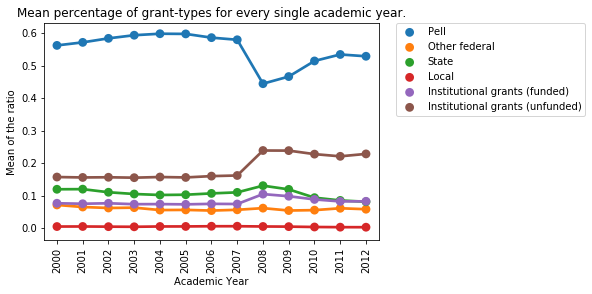

In [190]:
ax = sb.pointplot(data = df_sub_all2, x = 'academicyear', y = 'grant', hue = 'grant_type_name')
plt.xlabel('Academic Year')
plt.title('Mean percentage of grant-types for every single academic year.')
plt.ylabel('Mean of the ratio');                 
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

### 2.3 Machine Learning
#### 2.3.1 Initial Solution
<br>
After performing the data cleaning steps which I described in Chapter 2.1 I could move on with the Machine Learning part.<br>
<br>
First of all I used all available grant-type-ratios just as an initial test Regression.<br>
<br>
I immediately checked for multicollinearity by computing the Variance Inflation Factor (VIF) for each feature. The VIF is a measure of collinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given model’s betas divided by the variance of a single beta if it were fit alone. Specifically, I used the variance_inflation_factor function of the statsmodels-library.<br>
<br>
Both the VIF of grant01_ratio as well as the VIF of grant06_ratio are way to high because they are greater than 10. You can find some background information on VIF on GitHub. This is no surprise because the different ratios add up to one and therefore the independent variables are related to one another. One way to avoid the multicollinearity is to exclude at least one of the features. Since Pell grants are much more relevant than Institutional grants unfunded (according to my exploratory analysis in Chapter 2.2.2) I decided to exclude grant06_ratio.<br>
<br>
Since the initial model has an issue regarding multicollinearity I will not discuss its results at all. Specifically, the values of the different features are highly questionable and therefore not discussed in detail.

In [69]:
df_00_12_cleaned['intercept'] = 1

In [71]:
lm_grant = sms.OLS(df_00_12_cleaned['totaldegrees_100_percent_fte'], df_00_12_cleaned[['intercept','grant01_ratio','grant02_ratio','grant03_ratio','grant04_ratio','grant05_ratio','grant06_ratio']])
results_grant = lm_grant.fit()
results_grant.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     totaldegrees_100%fte   R-squared:                       0.215
Model:                              OLS   Adj. R-squared:                  0.215
Method:                   Least Squares   F-statistic:                     2878.
Date:                  Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                          20:35:42   Log-Likelihood:                 38055.
No. Observations:                 63075   AIC:                        -7.610e+04
Df Residuals:                     63068   BIC:                        -7.603e+04
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept         0.3235      0.007     47.648      0.000       0.310       0.337
grant01_ratio    -0.2330      0.007    -33.658      0.000      -0.247      -0.219
grant02_ratio    -0.0719      0.008     -8.738      0.000      -0.088      -0.056
grant03_ratio    -0.0007      0.008     -0.091      0.927      -0.015       0.014
grant04_ratio    -0.2546      0.014    -17.616      0.000      -0.283      -0.226
grant05_ratio    -0.0381      0.007     -5.265      0.000      -0.052      -0.024
grant06_ratio    -0.0386      0.007     -5.557      0.000      -0.052      -0.025
==============================================================================
Omnibus:                    26874.963   Durbin-Watson:                   0.560
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           182868.590
Skew:                           1.921   Prob(JB):                         0.00
Kurtosis:                      10.404   Cond. No.                         42.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

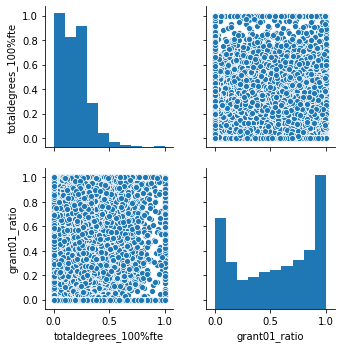

In [72]:
sb.pairplot(df_00_12_cleaned[['totaldegrees_100_percent_fte','grant01_ratio']])

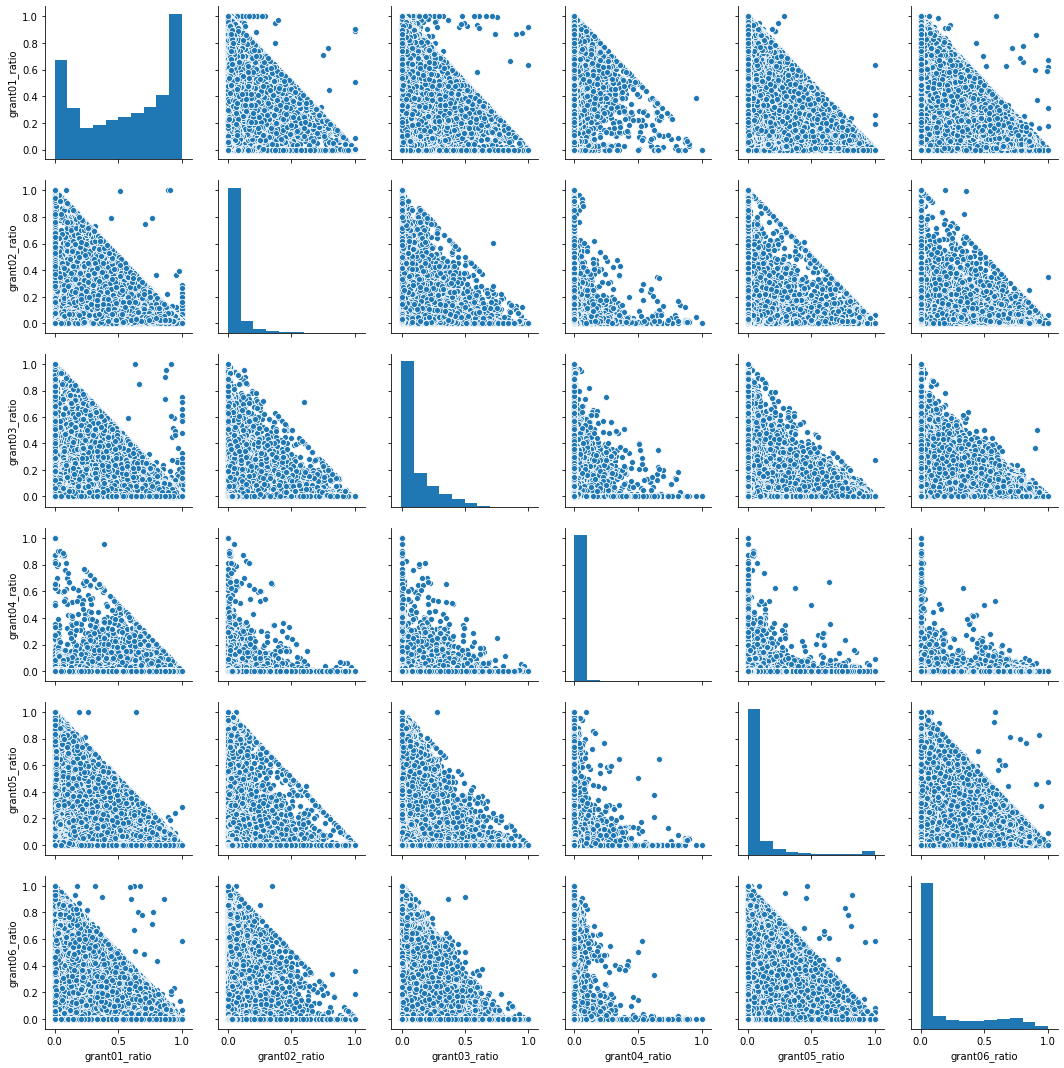

In [73]:
sb.pairplot(df_00_12_cleaned[['grant01_ratio','grant02_ratio','grant03_ratio','grant04_ratio','grant05_ratio','grant06_ratio']])

In [88]:
y, X = dmatrices('totaldegrees_100_percent_fte ~ grant021_ratio + grant02_ratio + grant03_ratio + grant04_ratio + grant05_ratio + grant06_ratio', df_00_12_cleaned, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 

In [84]:
vif

,VIF Factor,features
0,165.993773,Intercept
1,21.024075,grant01_ratio
2,3.058178,grant02_ratio
3,4.700613,grant03_ratio
4,1.250179,grant04_ratio
5,6.704969,grant05_ratio
6,13.449059,grant06_ratio


VIF Factor of Varibles grant01_ratio and grant06_ratio are greater than 10. We should remove these Variables.

#### 2.3.2 Final Solution
The VIFs are now at a very low level. Let's do a Multiple Linear Regression, but this time without the grant06_ratio feature.<br>
<br>
As we can see the R-squared did not decline despite we removed one independent variable. This is because the variable which we removed was highly related to the other variables and caused multicollinearity. Excluding this variable did not harm the explanatory power of the final model at all.<br>
<br>
The R-squared of 0.215 means that 21.5% of the variance in the dependent variable is predictable from the independent variables. I didn't expect the R-squared to be much higher since in reality there are many more al well as more relevant independent variables influencing the degree completion rate. One example is the number of university staff (e.g. professors) per 100 full time equivalent students enrolled. Another example could be modern education facilities and modern digital infrastructure, which both help making a student's life easier. One could also think of the grant-types as an indirect factor: scholarships (that were funded by e.g. the state) make a student's life much more easier as he or she can focus on academia instead of worrying about financing issues. This could lead on average to a higher degree completion rate.<br>
<br>
Including the other variables within the Delta Cost Project Database could increase the explanatory power of the model even further. One could easily think of the absolute amount of grants (instead of the ratios): More grants in absolute terms would mean that the average student would get more financial aid. However to answer the question "What types of financial aid are most effective in maximizing degree completion rates?" it is a better way to focus solely on the ratios of different grant-types. In future studies one could combine ratio- as well as absolute-values in one single model.<br>
<br>
But now let's have a look at the different features: Every single feature except grant05_ratio has a P-value of zero. This means that we can reject the null-hypothesis and accept the alternative hypothesis stating that the value of the feature is non-zero. In other words for all features (except grant05_ratio) we can observe statically significance. Out of those feature which are statically significant only the grant03_ratio has a slightly positive value (+0.04) which indicates that a higher ratio of state grants translates into a higher degree completion rate. On the other side the effect of grant04_ratio (-0.22) and grant01_ratio (-0.20) are much stronger and influence the degree completion rate in a negative way. Furthermore, grant02_ratio (-0.04) influences the degree completion rate in a negative way as well but this effect is as weak as the effect of grant03_ratio.<br>
<br>
As I already stated, for the final model the VIFs indicate that multicollinearity is not present any longer. The final model worked better than the initial model (in terms of measures of multicollinearity) because I ensured that the different variables are no longer highly related to one another.<br>

In [104]:
# First of all I will try to remove just one of those variables that had a VIF-Factor greater than 10
# I will remove grant06_ratio because Pell grants (grant1) are more relevant according to the mean of the grant-type-to-total-grant-ratio

y, X = dmatrices('totaldegrees_100_percent_fte ~ grant01_ratio + grant02_ratio + grant03_ratio + grant04_ratio + grant05_ratio', df_00_12_cleaned, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,9.741025,Intercept
1,1.604966,grant01_ratio
2,1.090820,grant02_ratio
3,1.188803,grant03_ratio
4,1.009889,grant04_ratio
5,1.455771,grant05_ratio


Now all the VIF-Factors are at a very low level. I can proceed and will do a MLR again.

In [105]:
lm_grant_without_multicollinearity = sms.OLS(df_00_12_cleaned['totaldegrees_100_percent_fte'], df_00_12_cleaned[['intercept','grant01_ratio','grant02_ratio','grant03_ratio','grant04_ratio','grant05_ratio']])
results_grant_without_multicollinearity = lm_grant_without_multicollinearity.fit()
results_grant_without_multicollinearity.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     totaldegrees_100_percent_fte   R-squared:                       0.215
Model:                                      OLS   Adj. R-squared:                  0.214
Method:                           Least Squares   F-statistic:                     3445.
Date:                          Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                                  21:22:49   Log-Likelihood:                 38039.
No. Observations:                         63075   AIC:                        -7.607e+04
Df Residuals:                             63069   BIC:                        -7.601e+04
Df Model:                                     5                                         
Covariance Type:                      nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept         0.2869      0.002    174.396      0.000       0.284       0.290
grant01_ratio    -0.1960      0.002   -102.466      0.000      -0.200      -0.192
grant02_ratio    -0.0352      0.005     -7.166      0.000      -0.045      -0.026
grant03_ratio     0.0354      0.004      9.367      0.000       0.028       0.043
grant04_ratio    -0.2194      0.013    -16.885      0.000      -0.245      -0.194
grant05_ratio    -0.0025      0.003     -0.748      0.455      -0.009       0.004
==============================================================================
Omnibus:                    26970.164   Durbin-Watson:                   0.558
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           183556.234
Skew:                           1.929   Prob(JB):                         0.00
Kurtosis:                      10.413   Cond. No.                         28.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Conclusion
<br>
By analyzing the Delta Cost Project Data I came up with some findings regarding the degree completion rates as well as different grant-types and their ratios. The exploratory analysis showed that over time the pell-grant-ratio decreases while the other grant-type-ratios as well as the overall degree completion rate increases. On a lower level of data analysis we could observe that there is a variance regarding the distribution of the pell-grant-ratios. On the other hand all other grant-type-ratio had a much lower variance.<br>
<br>
When it comes to performing machine learning techniques it’s all about preventing multicollinearity. I therefore computed the VIFs and improved the model by removing the unfunded-institutional-grant-ratio variable. After doing so the R-squared did not decline, but at the same time the measure for multicollinearity improved drastically. Only one of the remaining features proofed not to be statistically significant. The state-grant-ratio seems to have a positive effect on the degree completion rate. However this effect is rather weak. The local- as well as the pell-grant-ratio has a much stronger effect, but in these cases in negative direction.<br>
<br>
One could change this model by adding more relevant features to further improve the explanatory power. At the same time this could cause multicollinearity issues again because one added a variable that is (highly) related to another one. When you consider changing or adding variables you should always checking the VIFs again as well. By doing so there are no limits for your creativity.<br>

You can find the full Analysis and additional Charts in my GitHub Repository. And you can find the full raw Data Set on the IPEDS ANALYTICS : DELTA COST PROJECT DATABASE Website: https://nces.ed.gov/ipeds/deltacostproject/

Thanks for your Interest.